In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import os
import seaborn as sns

sns.set_style("white")

In [2]:
print(os.getcwd())
(os.chdir("../"))
print(os.getcwd())

['c:', 'Users', 'astro', 'Documents', 'Python_Project', 'ForecastCloudinJapan', 'EDA']
c:\Users\astro\Documents\Python_Project\ForecastCloudinJapan


In [80]:
target = 2010
dt = datetime.datetime(target,1,2)
path = f"obsData/44_47662/{dt.year}/"

all_df = pd.read_csv(path+"1/"+f"44_47662_{dt.year}_1_1.csv")


while True:
    path = f"obsData/44_47662/{dt.year}/"
    tmpdf = pd.read_csv(f"{path}{dt.month}/44_47662_{dt.year}_{dt.month}_{dt.day}.csv")
    all_df = pd.concat([all_df,tmpdf])
    dt += datetime.timedelta(days=1)
    del tmpdf
    if dt.year == 2023:
        break
    print(f"\r{dt}",end="")


2022-12-31 00:00:00

In [81]:
all_df.describe()

,時間,現地気圧,海面気圧,降水量,気温,露点温度,蒸気圧,湿度,風速,降雪,積雪,天気,雲量,視程
count,113952.000000,113949.000000,113948.000000,113952.000000,113948.000000,113901.000000,113901.000000,113903.000000,113901.000000,51947.000000,51958.000000,113952.0,113952.000000,113952.000000
mean,12.500000,1010.464560,1013.885503,0.190598,16.565506,9.573421,14.540437,66.030658,2.867725,0.002175,0.071827,0.0,1.921256,5.597387
std,6.922217,7.228237,7.241913,1.166070,8.375742,10.581295,8.892208,20.261803,1.481932,0.079068,0.894775,0.0,3.669373,10.007752
min,1.000000,965.500000,968.200000,0.000000,-3.600000,-23.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,6.750000,1005.700000,1009.100000,0.000000,9.300000,1.000000,6.600000,51.000000,1.800000,0.000000,0.000000,0.0,0.000000,0.000000
50%,12.500000,1010.400000,1013.900000,0.000000,16.900000,10.700000,12.800000,67.000000,2.600000,0.000000,0.000000,0.0,0.000000,0.000000
75%,18.250000,1015.500000,1018.900000,0.000000,23.300000,19.000000,21.900000,82.000000,3.600000,0.000000,0.000000,0.0,0.500000,10.000000
max,24.000000,1033.800000,1036.800000,67.000000,37.400000,28.400000,38.700000,100.000000,15.900000,8.000000,27.000000,0.0,10.000000,50.000000


In [79]:
all_df["雲量"].unique()

array(['0', '0+', '10-', '9', '5', '1', '3', '8', '6', '2', '7', '10', 0,
       10, '4', 1, 6, 9, 7, 8, 3, 5, 2, 4], dtype=object)

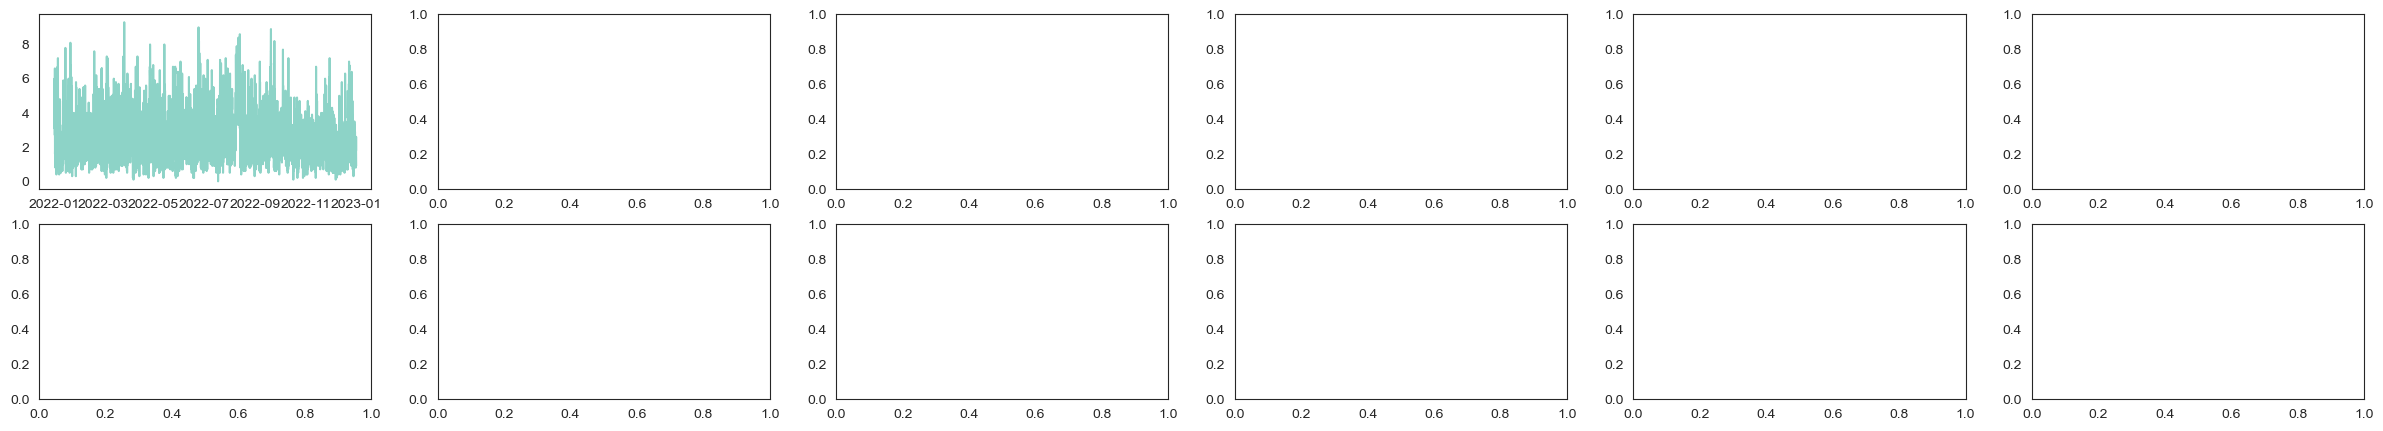

In [24]:
fig,ax = plt.subplots(2,6,figsize=(30,5))

ax[0][0].plot(pd.to_datetime(all_df["日付"]),all_df["風速"])

# ax[0][0].set_xticklabels(pd.to_datetime(all_df["日付"]), rotation=45, ha='right')
# ax[0][0].xaxis.set_major_locator(mdates.AutoDateLocator())
# ax[0][0].xaxis.set_major_formatter(mdates.AutoDateFormatter(mdates.MONTHLY))
# fig.autofmt_xdate(rotation=45)

plt.show()

2021-12-31 00:00:00

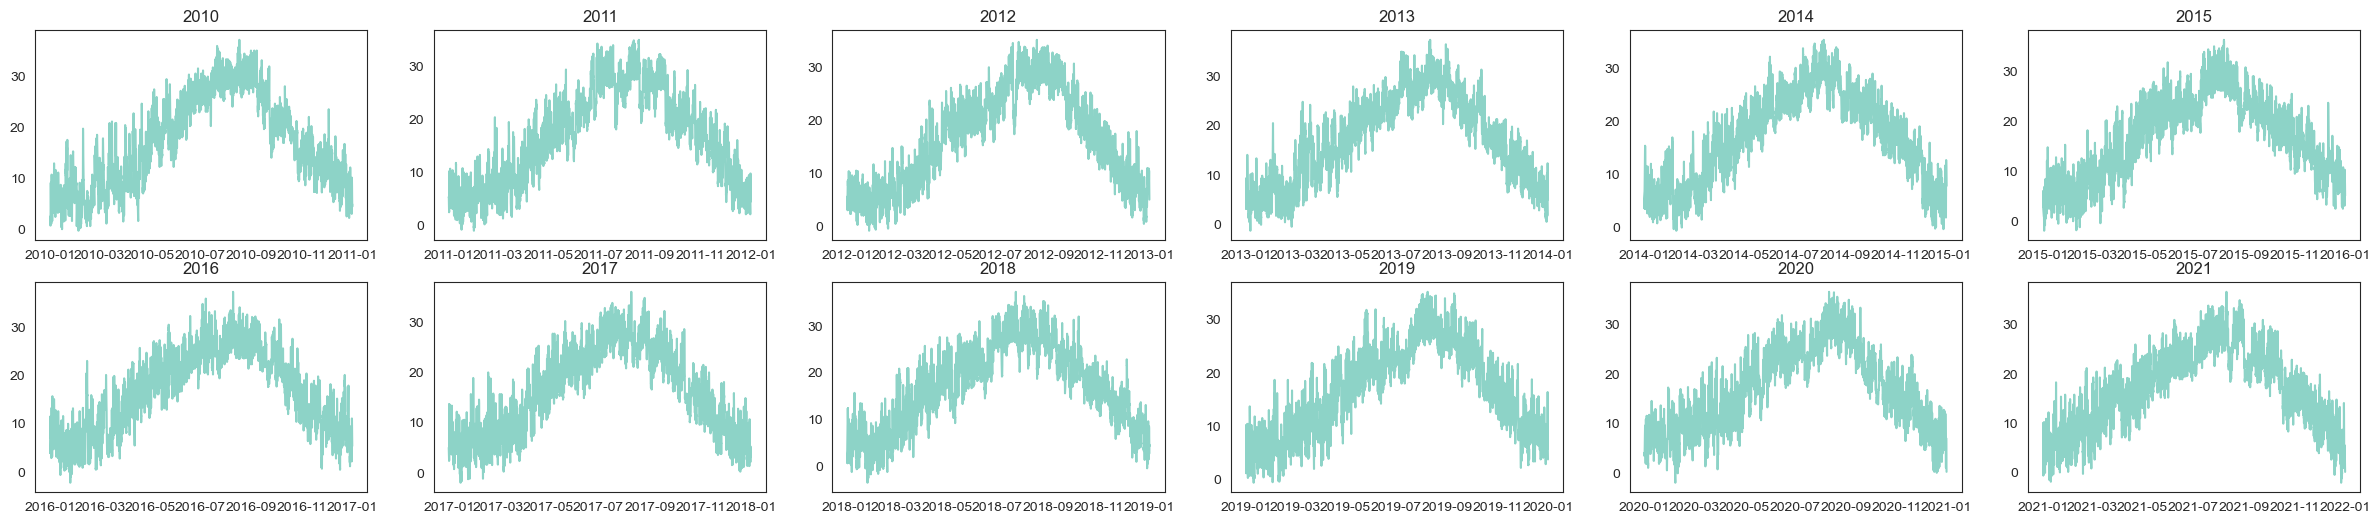

In [70]:
fig,ax = plt.subplots(2,6,figsize=(30,6))

dt = datetime.datetime(2010,1,2)

for i in range(2):
    for j in range(6):
        ax[i][j].set_title(f"{dt.year}")
        end = dt.year + 1
        path = f"obsData/44_47662/{dt.year}/"
        all_df = pd.read_csv(path+"1/"+f"44_47662_{dt.year}_1_1.csv")

        while True:
            path = f"obsData/44_47662/{dt.year}/"
            try:
                tmpdf = pd.read_csv(f"{path}{dt.month}/44_47662_{dt.year}_{dt.month}_{dt.day}.csv")
            except FileNotFoundError:
                break
            all_df = pd.concat([all_df,tmpdf])
            dt += datetime.timedelta(days=1)
            del tmpdf
            if dt.year == end:
                break

            print(f"\r{dt}",end="")
        
        ax[i][j].plot(pd.to_datetime(all_df["日付"]),all_df["気温"])

plt.show()